# How to use

This package use PyPlot to visualize figure and ImageMagick to make gif animation. If you haven't installed these packages, you have to do before using this package.

In [2]:
#Pkg.add("PyPlot")
#Pkg.clone("https://github.com/tkMeitner/Percolation.jl")
using Percolation, PyPlot

# Nearest Neighbor

First we make N by N lattice. Then we open each site with probability p and occupied with probability 1-p.

In [3]:
# N: lattice size
# p: occupied probability
N = 10; p = 0.6
square = squarenn(N, p)

Percolation.squarenn(10,0.6,[1 0 … 0 1; 1 1 … 0 1; … ; 1 0 … 1 0; 0 0 … 1 0],[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

To visualize initial condition, type following code.
The white, blue and red sites correspond to open, water and block sites, respectively.
We assume the top of this lattice contacts with water and it permeates the lattice gradually.
If a nearest neighbor site of a water site is open, the open site becomes water site.

We define "percolation" such that at least one path connected between top and bottom exists.
To check whether percolation occurs or not, use percolation function.
percolation function returns a value 0 or 1.
The first value represents if percolation occurs or not. 0 is not percolating and 1 is percolating.

In [4]:
percolation(square)

1

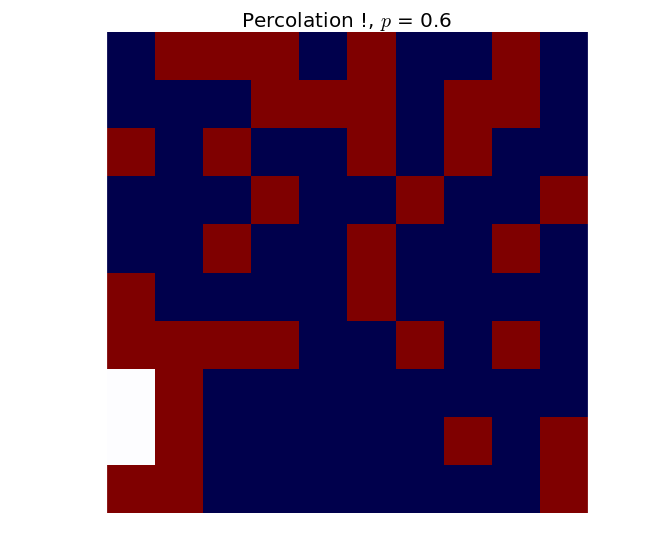

In [5]:
percolationplot(square)
# If you want to use other colormap, see http://matplotlib.org/examples/color/colormaps_reference.html

# Next nearest neighbor

If you want to simulate not only nearest neighbor but next nearest neighbor, use squarennn type.

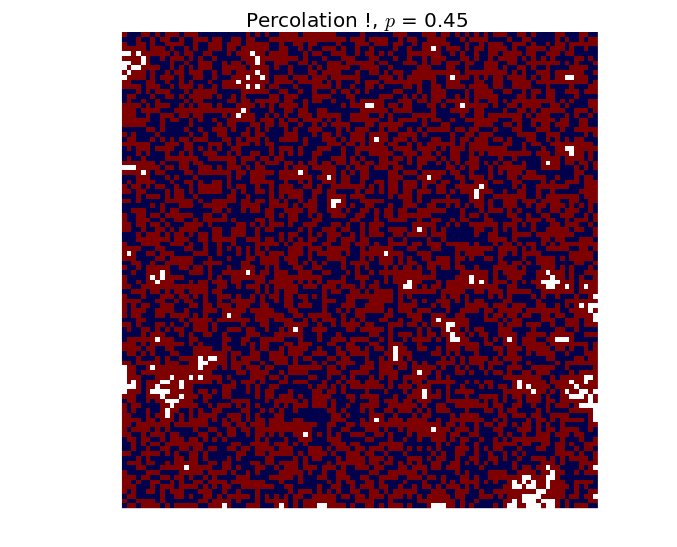

In [5]:
N = 100; p = 0.45
site = squarennn(N, p)
percolation(site)
percolationplot(site)

# GIF animation

To make gif animation, use percolationgif function.

In [ ]:
N = 20; p = 0.593;
site = squarenn(N, p) # or squarennn(N, p)
percolationgif(site)

# Triangular lattice

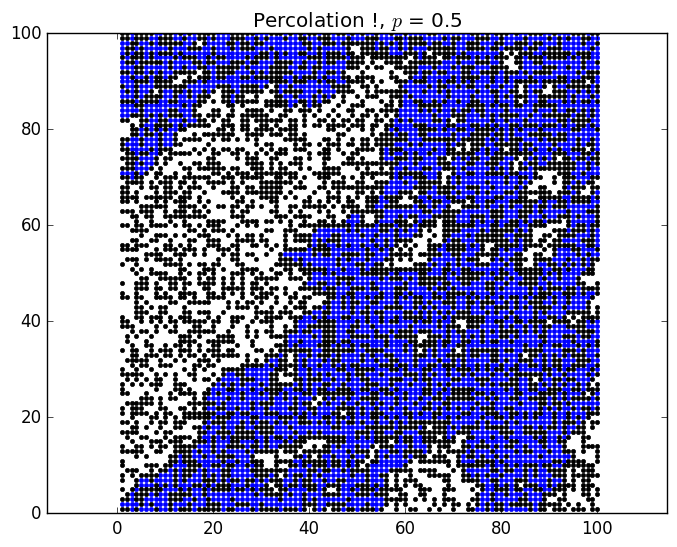

  0.063659 seconds (35.13 k allocations: 2.357 MB)


In [6]:
N = 100; p = 0.5;
tri = trinn(N, p);
@time percolation(tri)
percolationplot(tri)

# Honeycomb lattice

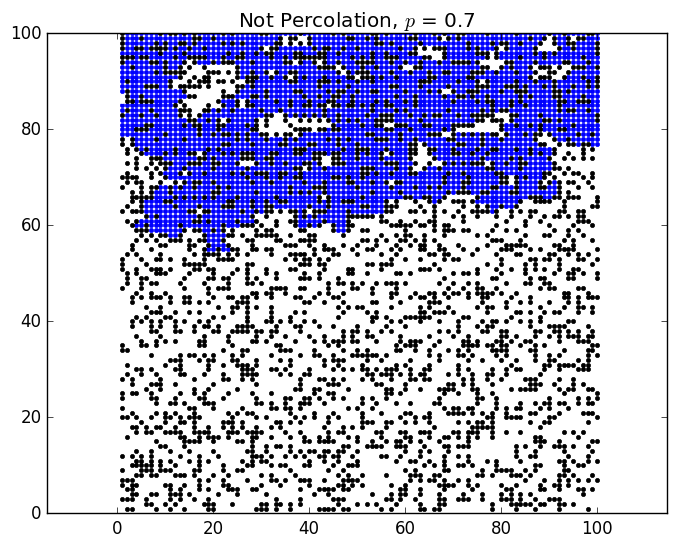

  0.096071 seconds (41.51 k allocations: 4.536 MB)


In [7]:
site = honeycomb(100, 0.7)
@time percolation(site)
percolationplot(site);

# Kagome lattice

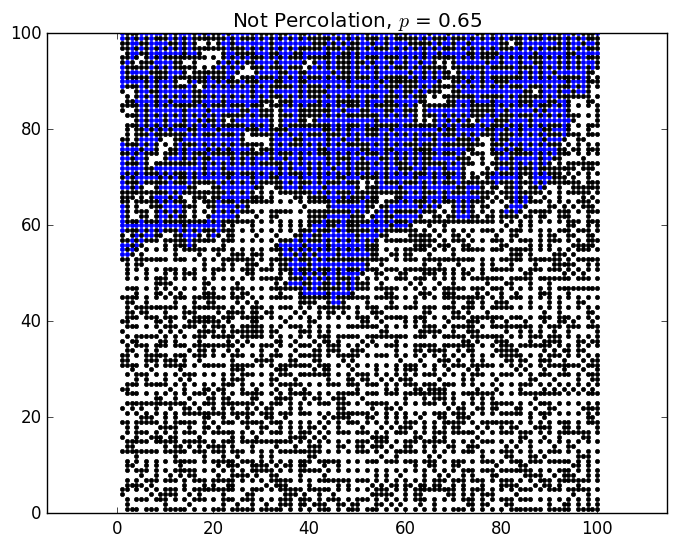

  0.113020 seconds (36.21 k allocations: 4.997 MB)


In [8]:
site = kagome(100, 0.65)
@time percolation(site)
percolationplot(site)

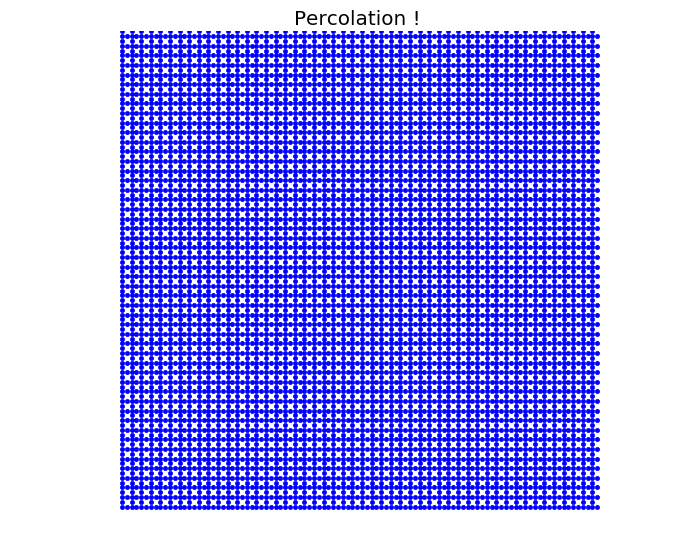

In [9]:
site = kagome(100, 1.0)
cluster(site)
clusterplot(site)

# d dimensional simple lattice

In [2]:
N = 20; dim = 3; p = 0.4;
simple = simplenn(N, dim, p);
@time percolation(simple)

  0.356433 seconds (497.17 k allocations: 17.292 MB, 2.15% gc time)


1

# Percolating probability

## square lattice, nearest neighbor

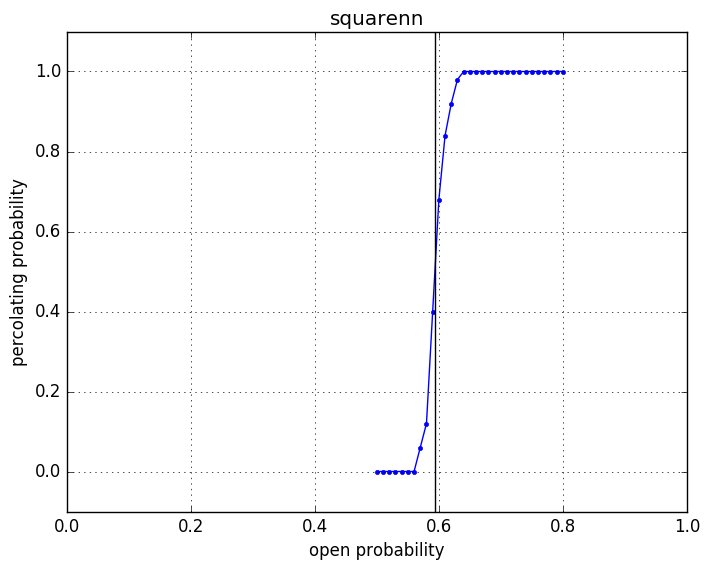

  2.008016 seconds (20.89 M allocations: 2.123 GB, 12.99% gc time)


In [6]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarenn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("squarenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

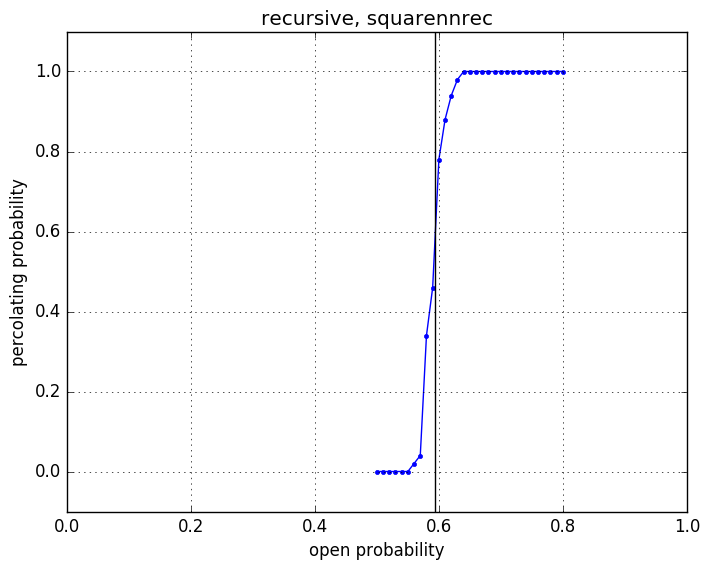

  6.188193 seconds (4.81 M allocations: 2.490 GB, 4.56% gc time)


In [10]:
plist = collect(0.5:0.01:0.8)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennrec(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennrec")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## square lattice, next nearest neighbor

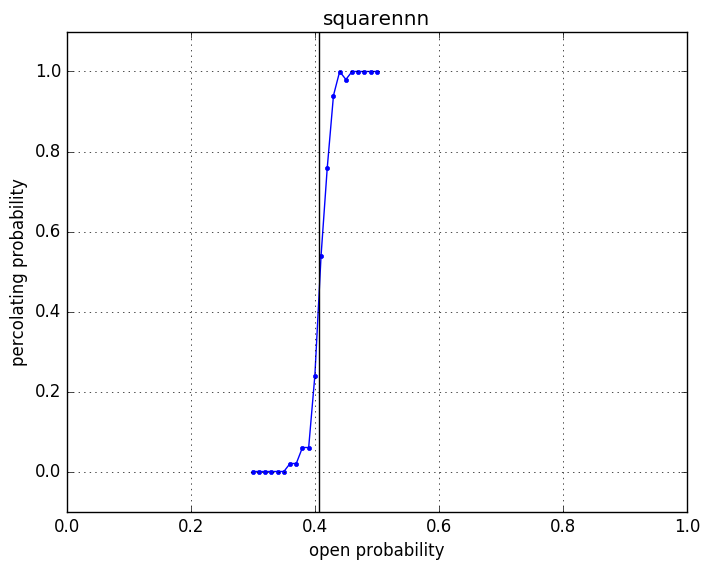

  1.094159 seconds (8.30 M allocations: 971.977 MB, 12.49% gc time)


In [11]:
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("squarennn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

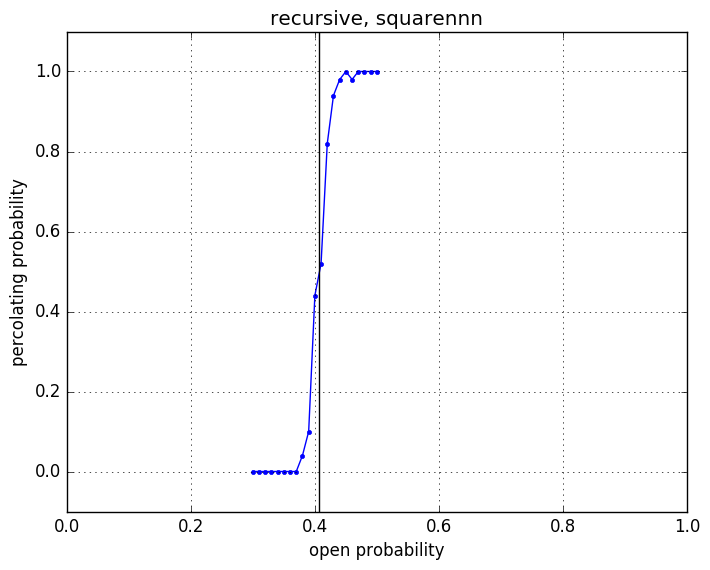

  0.383000 seconds (37.72 k allocations: 258.539 MB, 6.43% gc time)


In [12]:
plist = collect(0.3:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

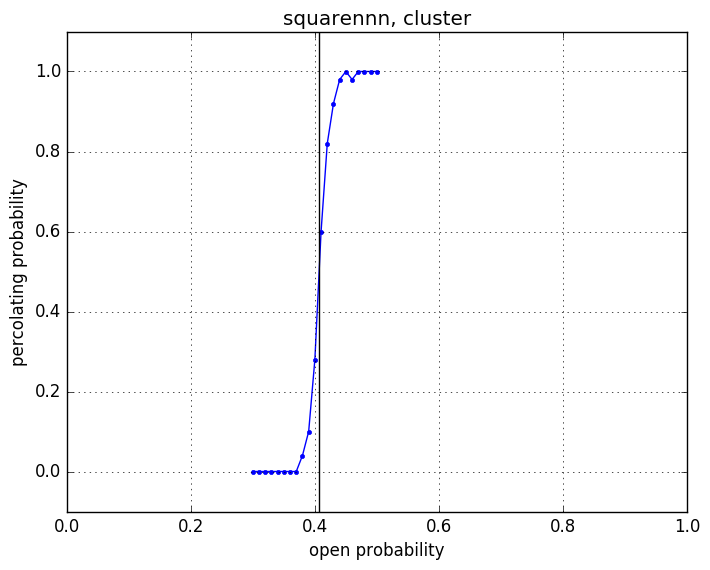

 40.836018 seconds (78.33 M allocations: 96.635 GB, 23.25% gc time)


In [13]:
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennn(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("squarennn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

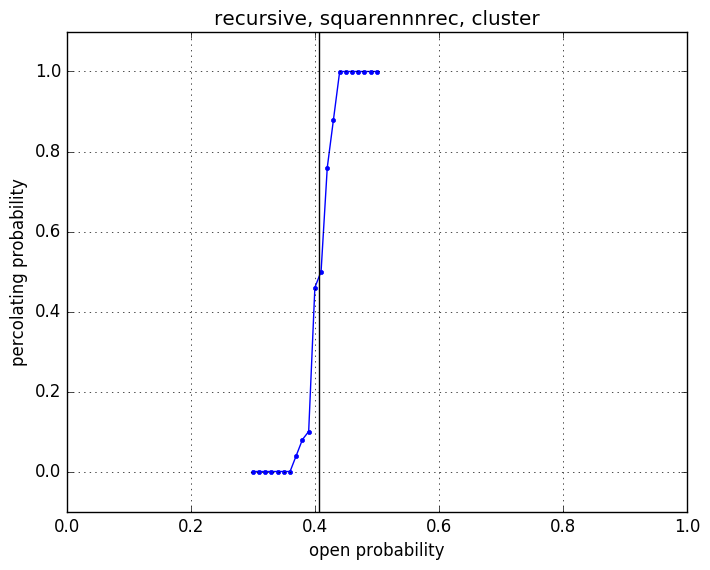

5.029185 seconds (3.12 M allocations: 1.626 GB, 3.94% gc time)


In [14]:
plist = collect(0.30:0.01:0.5)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = squarennnrec(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.407, 0.407], [-0.5, 1.1], "k")
grid("on")
title("recursive, squarennnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## triangular lattice

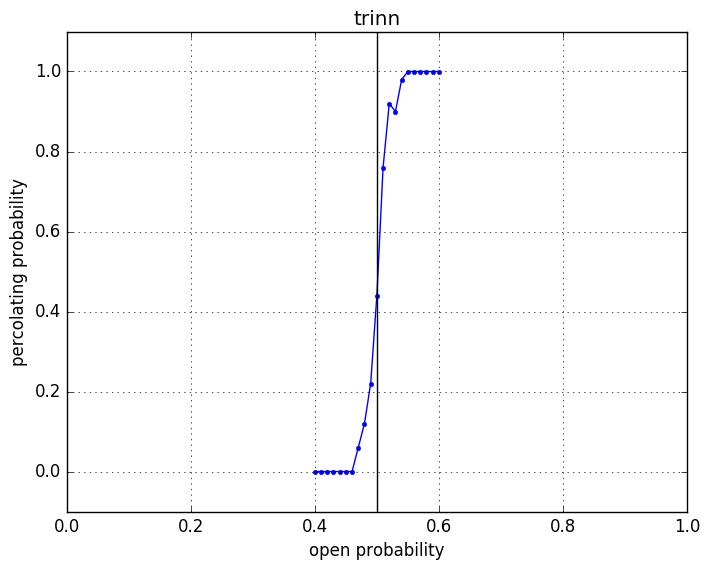

  1.878675 seconds (17.87 M allocations: 1.734 GB, 10.55% gc time)


In [15]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinn(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

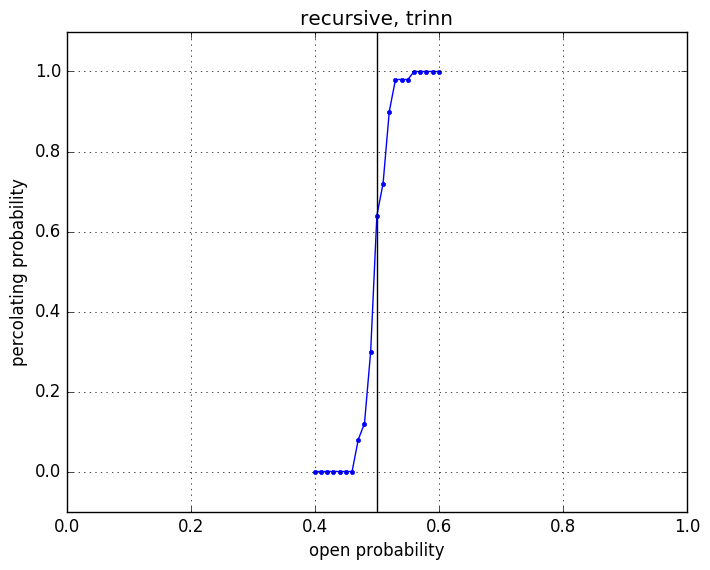

  0.380519 seconds (37.66 k allocations: 258.536 MB, 4.59% gc time)


In [16]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinnrec(N, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("recursive, trinn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

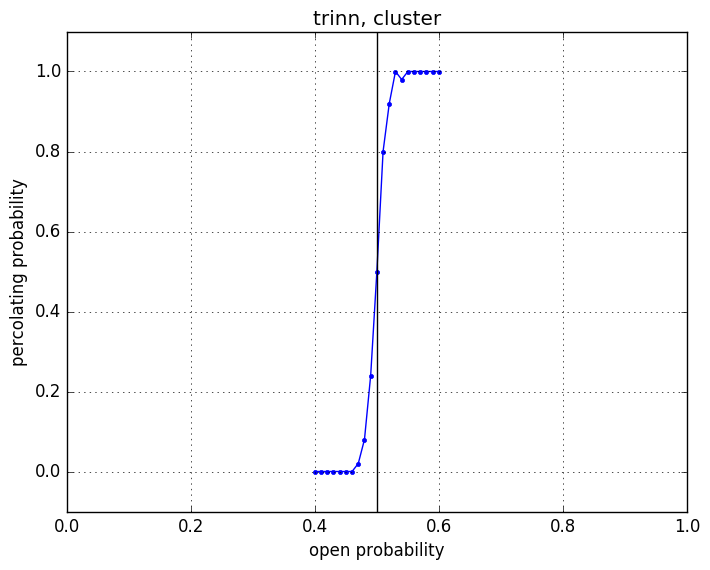

 43.097929 seconds (91.25 M allocations: 113.140 GB, 21.83% gc time)


In [17]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinn(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("trinn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

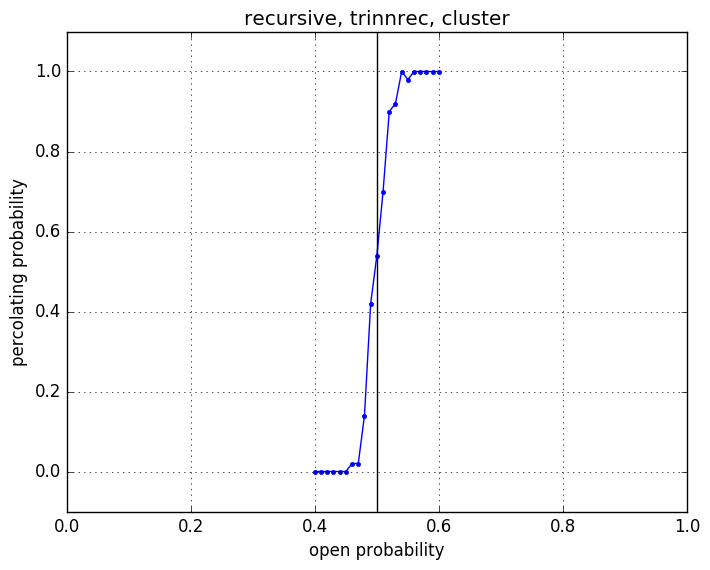

  5.272231 seconds (3.46 M allocations: 1.776 GB, 3.73% gc time)


In [18]:
plist = collect(0.4:0.01:0.6)
hit = zeros(Int64, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        square = trinnrec(N, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.5, 0.5], [-0.5, 1.1], "k")
grid("on")
title("recursive, trinnrec, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## simple lattice

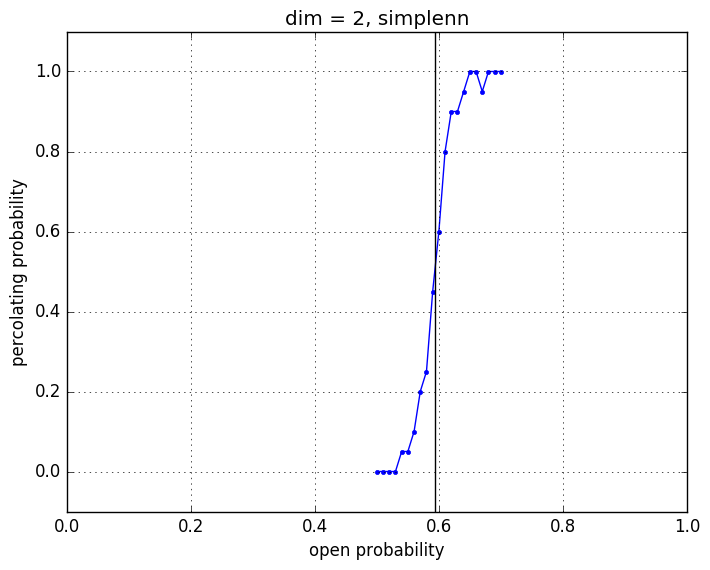

 17.121050 seconds (33.57 M allocations: 1.107 GB, 1.68% gc time)


In [24]:
plist = collect(0.5:0.01:0.7)
hit = zeros(Int64, length(plist))
N = 50; trial = 20; dim = 2
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.593, 0.593], [-0.5, 1.1], "k")
grid("on")
title("dim = $dim, simplenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

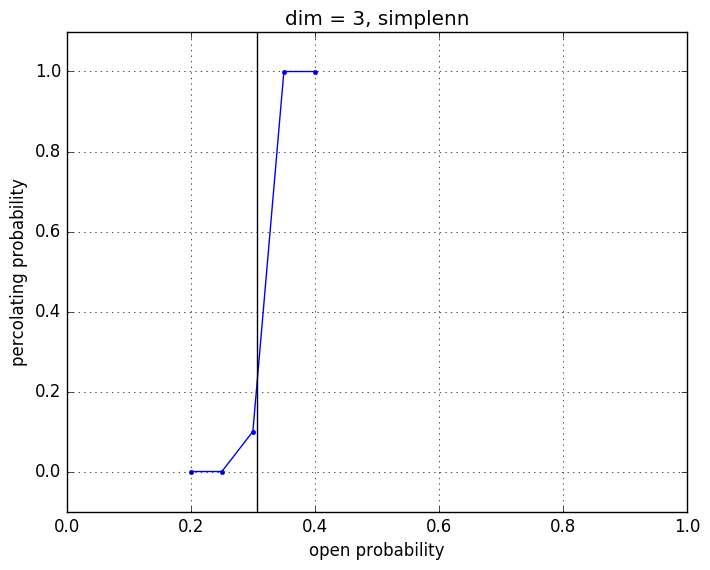

 10.452982 seconds (16.87 M allocations: 586.300 MB, 1.50% gc time)


In [33]:
plist = collect(0.2:0.05:0.4)
hit = zeros(Int64, length(plist))
N = 20; trial = 20; dim = 3
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.307, 0.307], [-0.5, 1.1], "k")
grid("on")
title("dim = $dim, simplenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

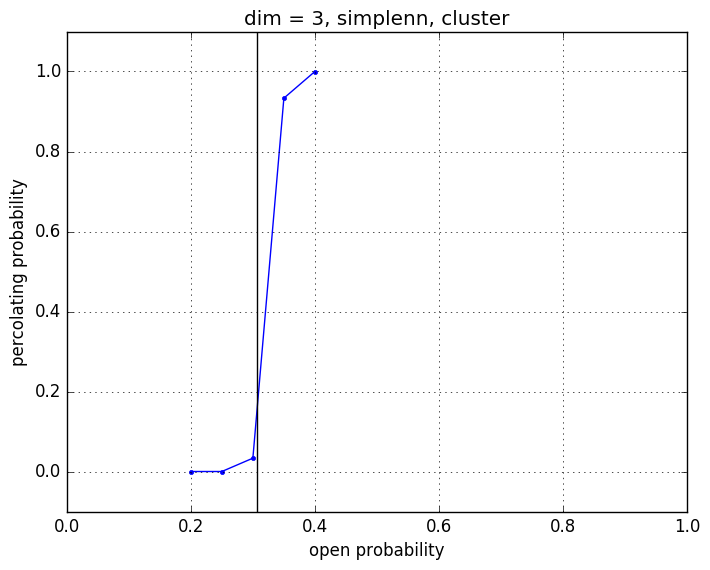

 17.134902 seconds (25.81 M allocations: 5.821 GB, 4.90% gc time)


In [34]:
plist = collect(0.2:0.05:0.4)
hit = zeros(Int64, length(plist))
N = 20; trial = 30; dim = 3
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.307, 0.307], [-0.5, 1.1], "k")
grid("on")
title("dim = $dim, simplenn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

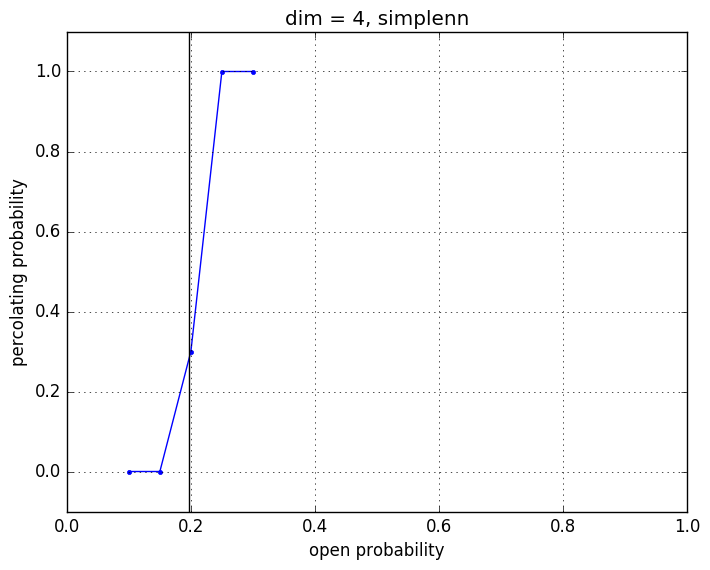

 18.108543 seconds (28.23 M allocations: 1004.121 MB, 1.53% gc time)


In [41]:
plist = collect(0.1:0.05:0.3)
hit = zeros(Int64, length(plist))
N = 10; trial = 20; dim = 4
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += percolation(square)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.1968, 0.1968], [-0.5, 1.1], "k")
grid("on")
title("dim = $dim, simplenn")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

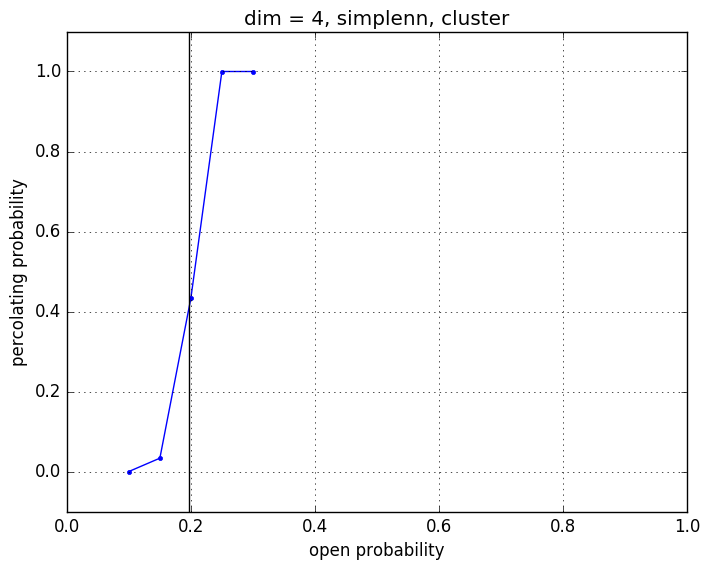

 29.549777 seconds (42.95 M allocations: 9.051 GB, 4.28% gc time)


In [42]:
plist = collect(0.1:0.05:0.3)
hit = zeros(Int64, length(plist))
N = 10; trial = 30; dim = 4
@time for i in 1:length(plist)
    for itr in 1:trial
        square = simplenn(N, dim, plist[i])
        hit[i] += cluster(square)[1]
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.1968, 0.1968], [-0.5, 1.1], "k")
grid("on")
title("dim = $dim, simplenn, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## honeycomb lattice

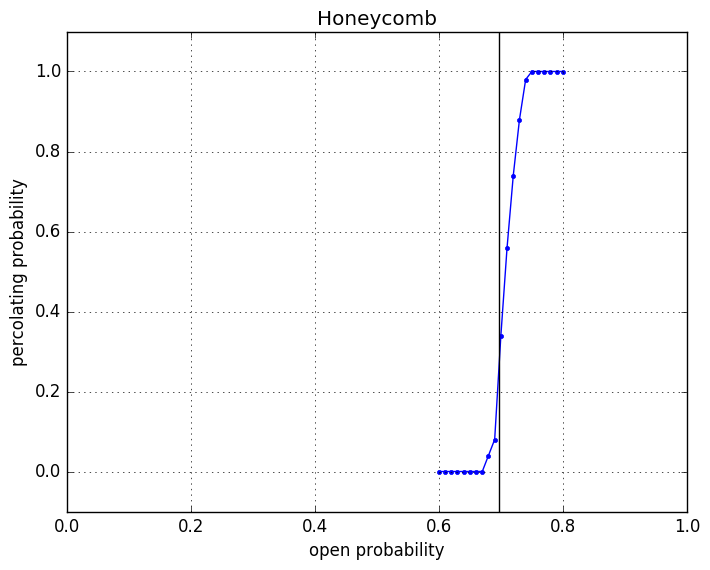

  7.445084 seconds (20.87 M allocations: 16.110 GB, 24.57% gc time)


In [43]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6962, 0.6962], [-0.5, 1.1], "k")
grid("on")
title("Honeycomb")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

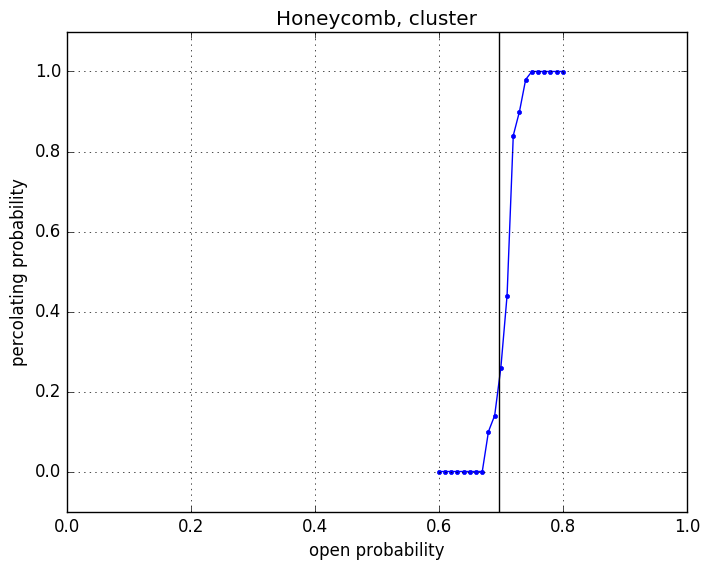

 37.540432 seconds (92.49 M allocations: 70.823 GB, 21.29% gc time)


In [44]:
plist = collect(0.6:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = honeycomb(N, plist[i])
        hit[i] += cluster(site)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6962, 0.6962], [-0.5, 1.1], "k")
grid("on")
title("Honeycomb, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

## Kagome lattice

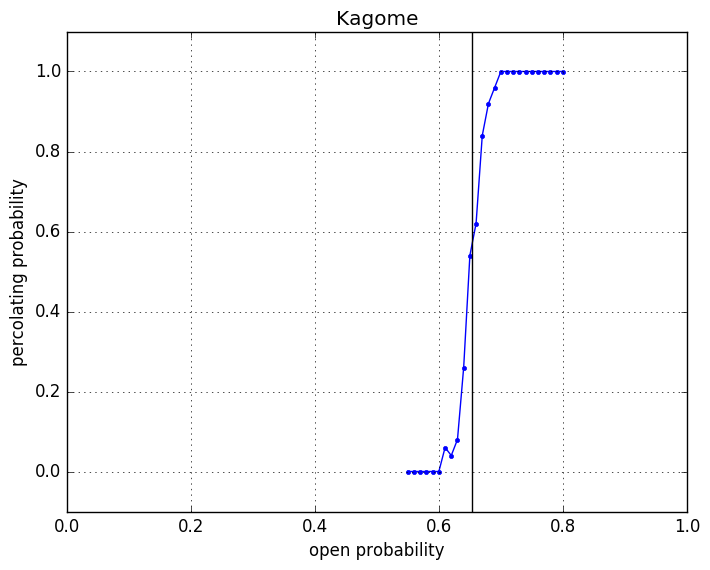

 13.316230 seconds (28.17 M allocations: 30.897 GB, 24.72% gc time)


In [45]:
plist = collect(0.55:0.01:0.8)
#plist = collect(0.0:0.1:1)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6527, 0.6527], [-0.5, 1.1], "k")
grid("on")
title("Kagome")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

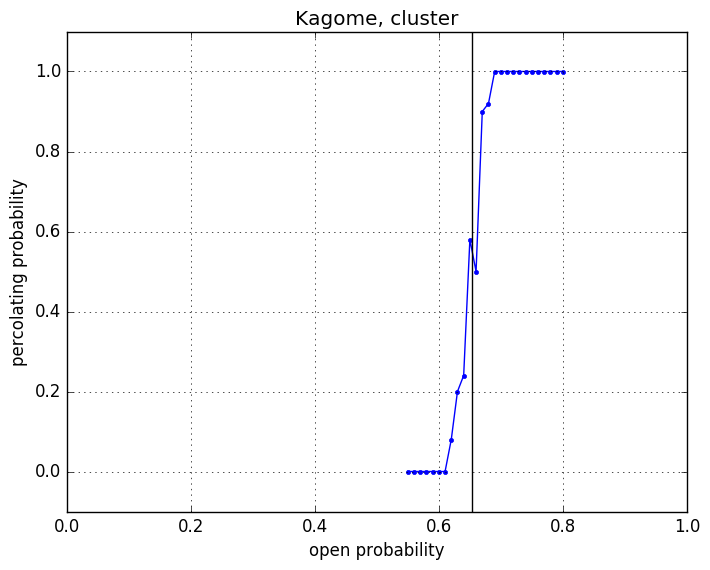

 49.421815 seconds (101.91 M allocations: 121.183 GB, 22.54% gc time)


In [46]:
plist = collect(0.55:0.01:0.8)
#plist = collect(0.0:0.1:1)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += cluster(site)[1] * 1
    end
end
hit /= trial;
plot(plist, hit, ".-")
plot([0.6527, 0.6527], [-0.5, 1.1], "k")
grid("on")
title("Kagome, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

# Clustering

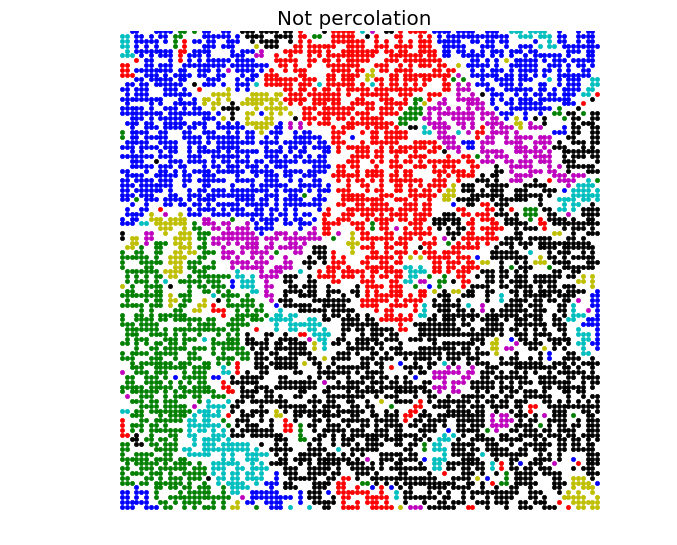

In [47]:
site = squarennrec(100, 0.6); cluster(site); clusterplot(site);

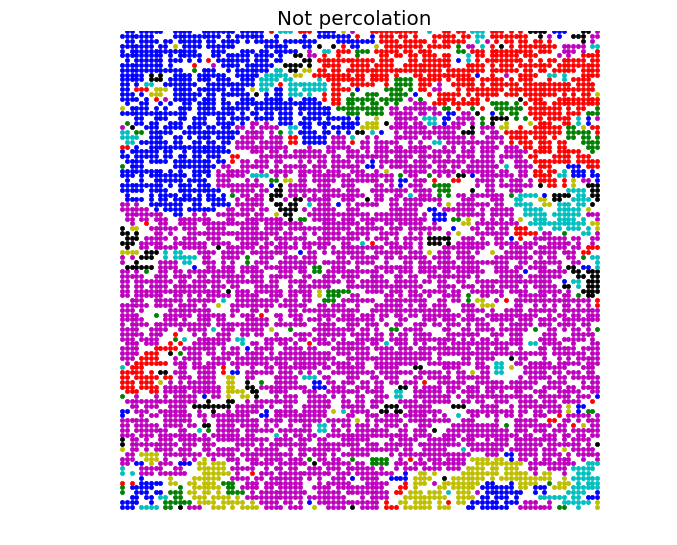

In [48]:
site = honeycomb(100, 0.7); cluster(site); clusterplot(site);